In [1]:
import sys
import os
sys.path.append('../../') # Add the root directory to sys.path

In [2]:
import pandas as pd
import glob
import re
from models.starnet import StarNet
from astropy.io.votable import parse_single_table
import numpy as np

In [3]:
df_xp = pd.read_parquet('../../datasets/Gaia DR3/df_xp.parquet')

In [4]:
df_xp

,source_id,teff_gspphot,logg_gspphot,mh_gspphot,spectraltype_esphs,Cat
0,466475508969557888,18411.494141,3.5385,-0.3139,B,M
1,3325513363920961408,16151.836914,3.7164,0.0395,B,M
2,3375508943611375488,18823.841797,3.4316,0.2918,B,M
3,4063973032805550592,15295.044922,3.4026,0.0999,G,M
4,194412313130613248,NaN,NaN,NaN,B,M
...,...,...,...,...,...,...
23631,5912596947718581760,4950.860352,3.2933,-0.2100,K,LM
23632,5912764520164418048,5681.474121,4.5653,-0.1923,G,LM
23633,5912764520164428032,6002.563477,4.2886,-0.4792,G,LM
23634,2263622213680760320,5369.893555,4.0945,-0.1173,K,LM


In [5]:
data_dir = '../../datasets/Gaia DR3/XP'
files = [file for file in glob.glob(data_dir + '/*.vot')]


dict = {}
pattern = r'_(\d+)\.vot$'

for file in files:
    match = re.search(pattern, os.path.basename(file))
    numeric_id = match.group(1)
    df = parse_single_table(file).to_table().to_pandas()    
    dict[numeric_id] = df['flux']

data = pd.DataFrame(dict)
data= data.T

In [6]:
data = data.reset_index()
data.rename(columns={'index':'source_id'}, inplace=True)
data

,source_id,0,1,2,3,4,5,6,7,8,...,333,334,335,336,337,338,339,340,341,342
0,1006259095984519040,4.512748e-14,4.432693e-14,4.108737e-14,3.899362e-14,3.999599e-14,4.105217e-14,3.902231e-14,3.489402e-14,3.491775e-14,...,2.346481e-15,2.214940e-15,2.093825e-15,1.931142e-15,1.805457e-15,1.719294e-15,1.653911e-15,1.702405e-15,1.776246e-15,1.980181e-15
1,1012746180227105536,1.117153e-13,1.202903e-13,1.076006e-13,9.052802e-14,8.775375e-14,9.528904e-14,9.692748e-14,8.691321e-14,8.294619e-14,...,4.528072e-15,4.292235e-15,4.111066e-15,3.880024e-15,3.746694e-15,3.705890e-15,3.696447e-15,3.901698e-15,4.098789e-15,4.509660e-15
2,1101876819022885504,1.437827e-13,1.336444e-13,1.225117e-13,1.149962e-13,1.144660e-13,1.133842e-13,1.071120e-13,1.016037e-13,1.091484e-13,...,1.483584e-14,1.418464e-14,1.372112e-14,1.307792e-14,1.272669e-14,1.262949e-14,1.255778e-14,1.312079e-14,1.356470e-14,1.463935e-14
3,1102797861873269504,8.436612e-13,8.930766e-13,7.843209e-13,6.408788e-13,6.030833e-13,6.527747e-13,6.763123e-13,6.168401e-13,5.819131e-13,...,4.211511e-14,4.064723e-14,3.972165e-14,3.821571e-14,3.742603e-14,3.717339e-14,3.672139e-14,3.780944e-14,3.824969e-14,4.021441e-14
4,1135587497636732672,3.027179e-14,3.213509e-14,2.944948e-14,2.607260e-14,2.520296e-14,2.561299e-14,2.499159e-14,2.343253e-14,2.447972e-14,...,5.858108e-16,5.491569e-16,5.112546e-16,4.597990e-16,4.147161e-16,3.775946e-16,3.464349e-16,3.431932e-16,3.518181e-16,3.949773e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23631,938228841240985728,4.854429e-14,4.784204e-14,4.547030e-14,4.233020e-14,4.053310e-14,3.935926e-14,3.813692e-14,3.750654e-14,3.948159e-14,...,4.411716e-15,4.210088e-15,4.054866e-15,3.838944e-15,3.704476e-15,3.644074e-15,3.597706e-15,3.746387e-15,3.879986e-15,4.217088e-15
23632,945819869517266048,9.312930e-14,9.217598e-14,8.792203e-14,7.991675e-14,7.707276e-14,7.912684e-14,7.741902e-14,6.845617e-14,6.549457e-14,...,1.270163e-14,1.209162e-14,1.160077e-14,1.092860e-14,1.048935e-14,1.027004e-14,1.011188e-14,1.053336e-14,1.095021e-14,1.198187e-14
23633,969823376583544576,2.448684e-13,2.674398e-13,2.546566e-13,2.319272e-13,2.274381e-13,2.344992e-13,2.335151e-13,2.194745e-13,2.175489e-13,...,1.070757e-14,1.018486e-14,9.778071e-15,9.239822e-15,8.923973e-15,8.822552e-15,8.795427e-15,9.284729e-15,9.765152e-15,1.076842e-14
23634,970353341187851008,1.957691e-13,1.875985e-13,1.654019e-13,1.484328e-13,1.489654e-13,1.543849e-13,1.507227e-13,1.401787e-13,1.408717e-13,...,2.251741e-14,2.122929e-14,2.017432e-14,1.884360e-14,1.797102e-14,1.754445e-14,1.730104e-14,1.812812e-14,1.901022e-14,2.099510e-14


In [7]:
df_xp['source_id'] = df_xp['source_id'].astype(str)
dataset = pd.merge(data, df_xp, on='source_id', how='inner')
dataset.to_parquet('./dataset.parquet')

d:\projects\stellarmapper\.venv\lib\site-packages\pandas\io\parquet.py:189: UserWarning: The DataFrame has column names of mixed type. They will be converted to strings and not roundtrip correctly.
  table = self.api.Table.from_pandas(df, **from_pandas_kwargs)


## Prepare dataset

In [8]:
cols_to_be_dropped = ['source_id', 'teff_gspphot', 'logg_gspphot','mh_gspphot', 'spectraltype_esphs']
dataset1 = dataset.drop(cols_to_be_dropped, axis=1, inplace=False)
dataset1

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,Cat
0,4.512748e-14,4.432693e-14,4.108737e-14,3.899362e-14,3.999599e-14,4.105217e-14,3.902231e-14,3.489402e-14,3.491775e-14,4.053357e-14,...,2.214940e-15,2.093825e-15,1.931142e-15,1.805457e-15,1.719294e-15,1.653911e-15,1.702405e-15,1.776246e-15,1.980181e-15,M
1,1.117153e-13,1.202903e-13,1.076006e-13,9.052802e-14,8.775375e-14,9.528904e-14,9.692748e-14,8.691321e-14,8.294619e-14,9.568855e-14,...,4.292235e-15,4.111066e-15,3.880024e-15,3.746694e-15,3.705890e-15,3.696447e-15,3.901698e-15,4.098789e-15,4.509660e-15,M
2,1.437827e-13,1.336444e-13,1.225117e-13,1.149962e-13,1.144660e-13,1.133842e-13,1.071120e-13,1.016037e-13,1.091484e-13,1.224405e-13,...,1.418464e-14,1.372112e-14,1.307792e-14,1.272669e-14,1.262949e-14,1.255778e-14,1.312079e-14,1.356470e-14,1.463935e-14,LM
3,8.436612e-13,8.930766e-13,7.843209e-13,6.408788e-13,6.030833e-13,6.527747e-13,6.763123e-13,6.168401e-13,5.819131e-13,6.559266e-13,...,4.064723e-14,3.972165e-14,3.821571e-14,3.742603e-14,3.717339e-14,3.672139e-14,3.780944e-14,3.824969e-14,4.021441e-14,M
4,3.027179e-14,3.213509e-14,2.944948e-14,2.607260e-14,2.520296e-14,2.561299e-14,2.499159e-14,2.343253e-14,2.447972e-14,2.835102e-14,...,5.491569e-16,5.112546e-16,4.597990e-16,4.147161e-16,3.775946e-16,3.464349e-16,3.431932e-16,3.518181e-16,3.949773e-16,LM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23631,4.854429e-14,4.784204e-14,4.547030e-14,4.233020e-14,4.053310e-14,3.935926e-14,3.813692e-14,3.750654e-14,3.948159e-14,4.162455e-14,...,4.210088e-15,4.054866e-15,3.838944e-15,3.704476e-15,3.644074e-15,3.597706e-15,3.746387e-15,3.879986e-15,4.217088e-15,LM
23632,9.312930e-14,9.217598e-14,8.792203e-14,7.991675e-14,7.707276e-14,7.912684e-14,7.741902e-14,6.845617e-14,6.549457e-14,7.581938e-14,...,1.209162e-14,1.160077e-14,1.092860e-14,1.048935e-14,1.027004e-14,1.011188e-14,1.053336e-14,1.095021e-14,1.198187e-14,M
23633,2.448684e-13,2.674398e-13,2.546566e-13,2.319272e-13,2.274381e-13,2.344992e-13,2.335151e-13,2.194745e-13,2.175489e-13,2.347998e-13,...,1.018486e-14,9.778071e-15,9.239822e-15,8.923973e-15,8.822552e-15,8.795427e-15,9.284729e-15,9.765152e-15,1.076842e-14,M
23634,1.957691e-13,1.875985e-13,1.654019e-13,1.484328e-13,1.489654e-13,1.543849e-13,1.507227e-13,1.401787e-13,1.408717e-13,1.516786e-13,...,2.122929e-14,2.017432e-14,1.884360e-14,1.797102e-14,1.754445e-14,1.730104e-14,1.812812e-14,1.901022e-14,2.099510e-14,LM


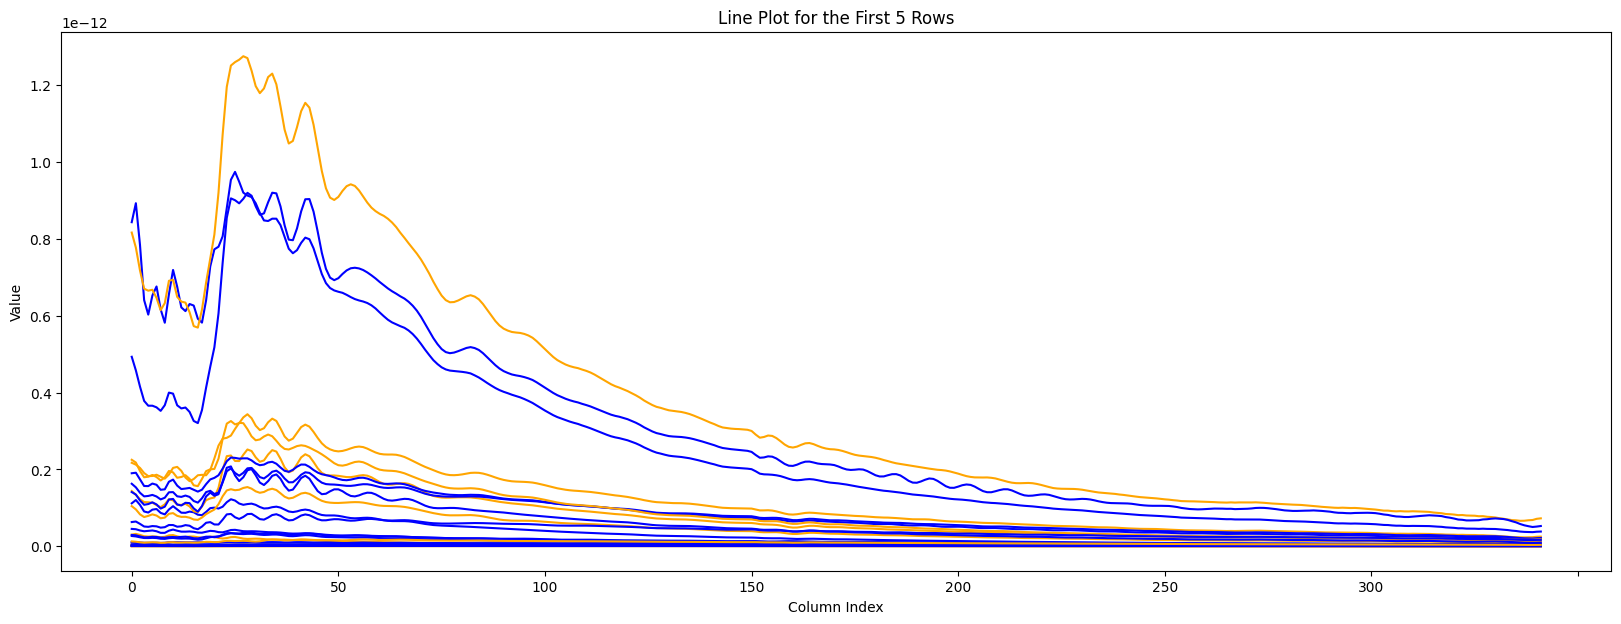

In [9]:
import matplotlib.pyplot as plt

# Customize the plot
plt.figure(figsize=(20, 7))

for i, row in dataset1.iterrows():
    if i > 30:
        break
    else:
        spec = row[:342]

        # Set colors based on the 'Cat' column
        color = 'blue' if row['Cat'] == 'M' else 'orange'

        # Plot each line separately
        spec.plot(color=color, label=f'Row {i + 1} - Category: {row["Cat"]}')

plt.title('Line Plot for the First 5 Rows')
plt.xlabel('Column Index')
plt.ylabel('Value')
plt.show()

In [10]:
# Set target column 1 for 'M' and 0 for 'LM'
dataset1['Cat'] = dataset1['Cat'].apply(lambda x: 1 if x == 'M' else 0)

In [11]:
X = dataset1.drop('Cat', axis=1)
y = dataset1['Cat']

split = 0.8

train_size = int(len(dataset1) * split)
test_size = len(dataset1) - train_size

X_train, X_test = np.split(X, [train_size])
y_train, y_test = np.split(y, [train_size])

d:\projects\stellarmapper\.venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
d:\projects\stellarmapper\.venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [12]:
num_labels = y_train.values.reshape(-1, 1).shape[1]
num_fluxes = X_train.shape[1]

In [13]:
model = StarNet(num_fluxes=num_fluxes, epochs = 10, num_labels=num_labels)
model.fit(X_train, y_train)
preds = model.predict(X_test)

Starting training...


Epoch 1/10: 100%|██████████| 591/591 [00:05<00:00, 106.90batch/s]


Epoch:   1,  training loss: 0.255657, time: 5.5 seconds


Epoch 2/10: 100%|██████████| 591/591 [00:07<00:00, 79.53batch/s] 


Epoch:   2,  training loss: 0.252009, time: 7.4 seconds


Epoch 3/10: 100%|██████████| 591/591 [00:06<00:00, 95.30batch/s] 


Epoch:   3,  training loss: 0.251215, time: 6.2 seconds


Epoch 4/10: 100%|██████████| 591/591 [00:05<00:00, 115.40batch/s]


Epoch:   4,  training loss: 0.251623, time: 5.1 seconds


Epoch 5/10: 100%|██████████| 591/591 [00:05<00:00, 114.23batch/s]


Epoch:   5,  training loss: 0.250862, time: 5.2 seconds


Epoch 6/10: 100%|██████████| 591/591 [00:06<00:00, 86.89batch/s] 


Epoch:   6,  training loss: 0.251138, time: 6.8 seconds


Epoch 7/10: 100%|██████████| 591/591 [00:06<00:00, 97.07batch/s] 


Epoch:   7,  training loss: 0.251069, time: 6.1 seconds


Epoch 8/10: 100%|██████████| 591/591 [00:05<00:00, 107.28batch/s]


Epoch:   8,  training loss: 0.250624, time: 5.5 seconds


Epoch 9/10: 100%|██████████| 591/591 [00:05<00:00, 102.62batch/s]


Epoch:   9,  training loss: 0.250788, time: 5.8 seconds


Epoch 10/10: 100%|██████████| 591/591 [00:05<00:00, 102.67batch/s]


Epoch:  10,  training loss: 0.250670, time: 5.8 seconds
Starting inference on test data...


Epoch 1/10: 100%|██████████| 148/148 [00:00<00:00, 293.31batch/s]


Epoch:   1, time:0.5 seconds


Epoch 2/10: 100%|██████████| 148/148 [00:00<00:00, 462.73batch/s]


Epoch:   2, time:0.3 seconds


Epoch 3/10: 100%|██████████| 148/148 [00:00<00:00, 355.20batch/s]


Epoch:   3, time:0.4 seconds


Epoch 4/10: 100%|██████████| 148/148 [00:00<00:00, 382.58batch/s]


Epoch:   4, time:0.4 seconds


Epoch 5/10: 100%|██████████| 148/148 [00:00<00:00, 521.85batch/s]


Epoch:   5, time:0.3 seconds


Epoch 6/10: 100%|██████████| 148/148 [00:00<00:00, 385.80batch/s]


Epoch:   6, time:0.4 seconds


Epoch 7/10: 100%|██████████| 148/148 [00:00<00:00, 437.74batch/s]


Epoch:   7, time:0.3 seconds


Epoch 8/10: 100%|██████████| 148/148 [00:00<00:00, 441.79batch/s]


Epoch:   8, time:0.3 seconds


Epoch 9/10: 100%|██████████| 148/148 [00:00<00:00, 469.69batch/s]


Epoch:   9, time:0.3 seconds


Epoch 10/10: 100%|██████████| 148/148 [00:00<00:00, 451.63batch/s]

Epoch:  10, time:0.3 seconds


In [14]:
print(preds)

tensor([[0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412],
        [0.5412]], device='cuda:0')
